#### [ rclpy 사용시 주의점 ]
- 반드시 터미널에서 humble 혹은 ros2study를 실행한 후, jupyther notebook을 실행하여야지 rclpy를 인식한다!!

### [1] Python으로 Topic Subscription

##### 1. my_sub_node 생성

In [1]:
import rclpy as rp
from turtlesim.msg import Pose

In [2]:
rp.init() # rp.init()은 딱 한번만 실행할것!

In [3]:
my_node = rp.create_node("my_sub_node")

##### 2. callback 함수 생성

In [4]:
def callback(data):
    print("============")
    print(f"/turtle1/pose : {data}")
    print(f"X : {data.x}")
    print(f"Y : {data.y}")
    print(f"Theta : {data.theta}")

##### 3. my_sub_node 구독

In [5]:
my_node.create_subscription(Pose, "/turtle1/pose", callback, 10)

In [6]:
# # 정리 : my_custom_node를 생성하여 /turtle1/pose를 subscription(구독)!
# import rclpy as rp
# from turtlesim.msg import Pose

# rp.init()
# my_node = rp.create_node("my_sub_node")

# # subscription
# my_node.create_subscription(Pose, "/turtle1/pose", callback, 10)

##### 4. my_sub_node 실행

In [7]:
rp.spin_once(my_node)

/turtle1/pose : turtlesim.msg.Pose(x=5.544444561004639, y=5.544444561004639, theta=0.0, linear_velocity=0.0, angular_velocity=0.0)
X : 5.544444561004639
Y : 5.544444561004639
Theta : 0.0


In [8]:
rp.spin(my_node)

/turtle1/pose : turtlesim.msg.Pose(x=5.544444561004639, y=5.544444561004639, theta=0.0, linear_velocity=0.0, angular_velocity=0.0)
X : 5.544444561004639
Y : 5.544444561004639
Theta : 0.0
/turtle1/pose : turtlesim.msg.Pose(x=5.544444561004639, y=5.544444561004639, theta=0.0, linear_velocity=0.0, angular_velocity=0.0)
X : 5.544444561004639
Y : 5.544444561004639
Theta : 0.0
/turtle1/pose : turtlesim.msg.Pose(x=5.544444561004639, y=5.544444561004639, theta=0.0, linear_velocity=0.0, angular_velocity=0.0)
X : 5.544444561004639
Y : 5.544444561004639
Theta : 0.0
/turtle1/pose : turtlesim.msg.Pose(x=5.544444561004639, y=5.544444561004639, theta=0.0, linear_velocity=0.0, angular_velocity=0.0)
X : 5.544444561004639
Y : 5.544444561004639
Theta : 0.0
/turtle1/pose : turtlesim.msg.Pose(x=5.544444561004639, y=5.544444561004639, theta=0.0, linear_velocity=0.0, angular_velocity=0.0)
X : 5.544444561004639
Y : 5.544444561004639
Theta : 0.0
/turtle1/pose : turtlesim.msg.Pose(x=5.544444561004639, y=5.54444

KeyboardInterrupt: 

![Screenshot from 2025-01-08 21-33-30.png](<attachment:Screenshot from 2025-01-08 21-33-30.png>)
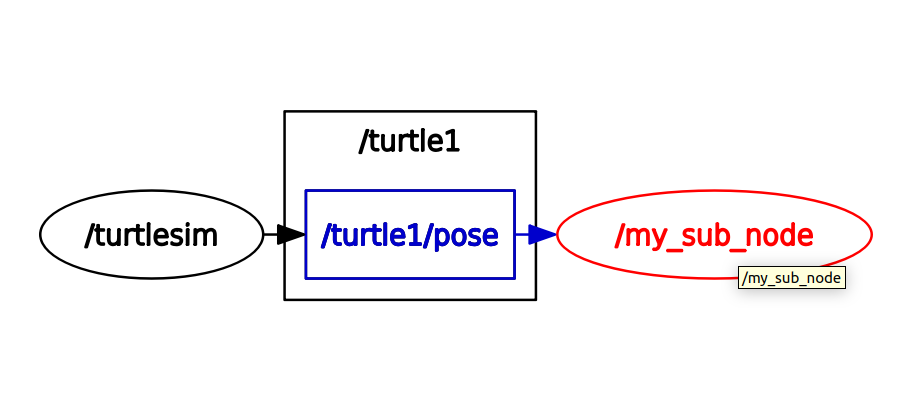

### [2] Python으로 Topic Publish

##### 1. my_pub_node 생성

In [9]:
import rclpy as rp
from geometry_msgs.msg import Twist

# rp.init()
my_node_2 = rp.create_node("my_pub_node")

##### 2. defination 확인 및 publish할 defination 값으로 수정

In [10]:
msg = Twist()
print(msg)

geometry_msgs.msg.Twist(linear=geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0), angular=geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0))


In [13]:
msg.linear.x = 3.5
msg.angular.z = 1.9
print(msg)

geometry_msgs.msg.Twist(linear=geometry_msgs.msg.Vector3(x=3.5, y=0.0, z=0.0), angular=geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=1.9))


##### 3. my_pub_node 발행 및 실행

In [14]:
pub = my_node_2.create_publisher(Twist, "/turtle1/cmd_vel", 10)

pub.publish(msg)

##### 4. [반복] my_sub_node 실행

In [16]:
cnt = 0

# 콜백함수 하나 설정하고
def timer_callback():
    global cnt

    cnt += 1
    print(cnt)

    pub.publish(msg)

    if cnt > 5:
        raise Exception("Publisher Stop!")

In [17]:
timer_period = 0.1
timer = my_node_2.create_timer(timer_period, timer_callback)
rp.spin(my_node_2)

1
2
3
4
5
6


Exception: Publisher Stop!

![Screenshot from 2025-01-08 21-33-39.png](<attachment:Screenshot from 2025-01-08 21-33-39.png>)
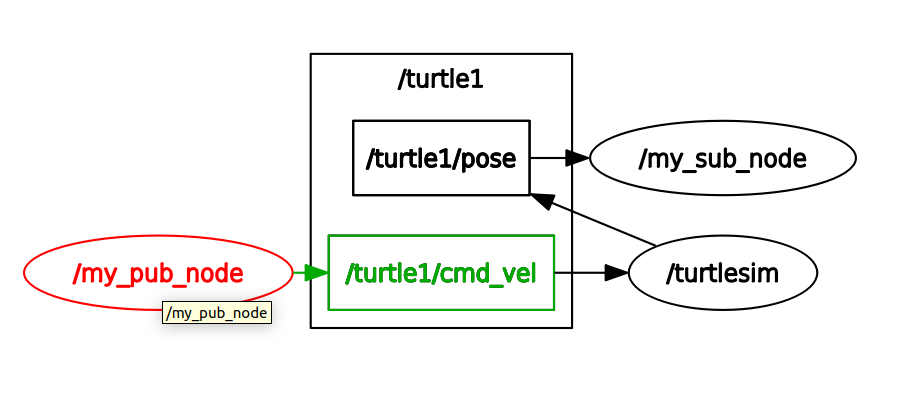